In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
from ultralytics import YOLO
import torch
from PIL import Image
from pathlib import Path
import pickle
import cv2

from utils import (predict_pic,
                   predict_and_plot_picture,
                   plot_gt, 
                   predict_from_dataset)


torch.cuda.is_available()

WARNING  Known issue with torch>=2.4.0 on Windows with CPU, recommend downgrading to torch<=2.3.1 to resolve https://github.com/ultralytics/ultralytics/issues/15049


True

In [3]:
model_detect = YOLO(r"runs\train\exp\weights\best.pt") 

### Predict one picture

c:\Users\nloma\anaconda3\envs\for_pip\lib\site-packages\torchvision\io\image.py:14: UserWarning: Failed to load image Python extension: '[WinError 1920] Доступ к этому файлу из системы отсутствует'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


image 1/1 c:\Users\nloma\Desktop\_\Kidney-stones-detection\datasets\images\val\07.07.23_cult_1.mp4_4124.png: 640x608 1 Urate, 48.2ms
Speed: 301.7ms preprocess, 48.2ms inference, 16.8ms postprocess per image at shape (1, 3, 640, 608)
Picture name: 07.07.23_cult_1.mp4_4124.png
Predict: Urate, Confidence: 0.9764010310173035


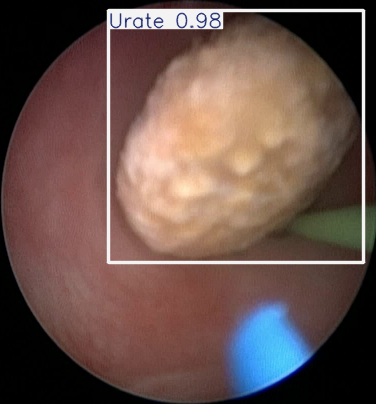

In [4]:
path_to_pic = Path(r"datasets\images\val\28.08.23_clt.mp4_912.png")
path_to_pic = Path(r"datasets\images\val\07.07.23_cult_1.mp4_4124.png")
#path_to_pic = Path(r"datasets/images/train/13.09.2023_cult.mp4_1789.png")
#path_to_pic = Path(r"datasets/images/train/17.08.23_fibro.mp4_2883.png")


predict_and_plot_picture(path_to_pic, model_detect)


### Predict internet examples


image 1/1 c:\Users\nloma\Desktop\_\Kidney-stones-detection\test_picture\uric1.png: 640x640 1 Stone, 17.0ms
Speed: 3.4ms preprocess, 17.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Picture name: uric1.png
Predict: Stone, Confidence: 0.9347596764564514


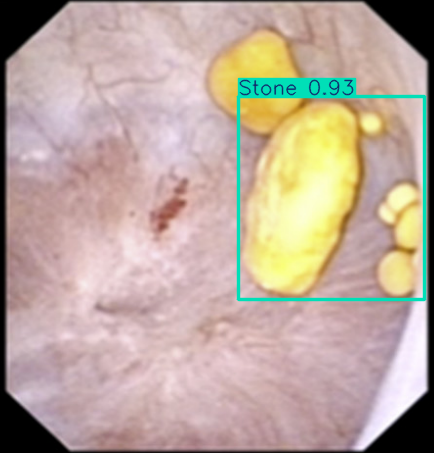

In [5]:

index = 10

root = Path(r'test_picture')
test_pictures = list(root.rglob('*.png'))

predict_and_plot_picture(test_pictures[index], model_detect)

### Draw pics from dataset (predict and GT)

Gt:Stone
Gt:Stone

image 1/1 c:\Users\nloma\Desktop\_\Kidney-stones-detection\datasets\images\train\u30.01_1.mp4_181.png: 640x608 2 Stones, 16.5ms
Speed: 3.5ms preprocess, 16.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 608)
Picture name: u30.01_1.mp4_181.png
Predict: Stone, Confidence: 0.945993185043335
Predict: Stone, Confidence: 0.9353057146072388


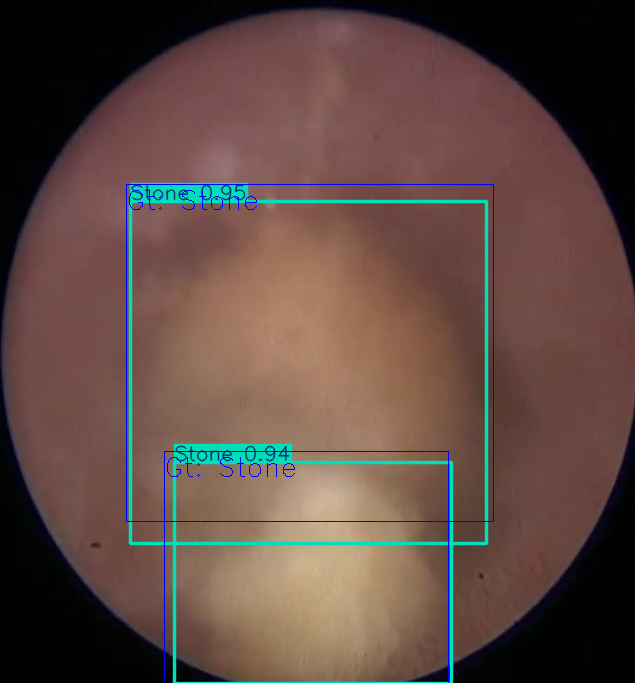

In [6]:
#path_to_pic = Path(r"datasets\images\val\05.07.2023_cult.mp4_1645.png")
#path_to_pic = Path(r"datasets\images\val\20.09.2023_cult_1M.mp4_4812.png")
#path_to_pic = Path(r"datasets\images\val\k1.mp4_740.png")
# path_to_pic = Path(r"datasets\images\train\26.07.23_fibro.mp4_10905.png")
path_to_pic = Path(r"datasets\images\train\u30.01_1.mp4_181.png")
#path_to_pic = Path(r"datasets/images/train/13.09.2023_cult.mp4_1789.png")
#path_to_pic = Path(r"datasets/images/train/17.08.23_fibro.mp4_2883.png")

predict_from_dataset(path_to_pic, model_detect)
